In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic regression

## Prediction

A trained logistic regression model will predict:

- $y=1\quad$ when $\quad g(\theta^T x) \ge 0.5 \quad(\Rightarrow\quad \theta^T x \ge 0)$
- $y=0\quad$ when $\quad g(\theta^T x) < 0.5 \quad(\Rightarrow\quad \theta^T x < 0)$

If the dot-product of $x$ and $\theta$ is $\ge0$ then the model predicts $y=1$, 
otherwise it predicts $y =0$. 

The sigmoid function $g: \mathbb{R} \mapsto [0 .. 1]$ is defined as:

$$g(z) = \frac{1}{1 + e^{-z}}$$


## Optimization

The vector $\theta$ is learned from the training data by minimizing the "cross-entropy" **cost function**:

$$ J(\theta) 
    = -\frac{1}{m} \sum_{i=1}^m 
    \left[
    y^{(i)} \; \log g(\theta^T x^{(i)}) 
    + (1 - y^{(i)}) \; \log (1 - g(\theta^T x^{(i)}))
    \right]
    + \frac{\lambda}{2m} \parallel \theta \,\parallel^2
$$

$$z = \theta^T x \quad\in [-\infty..\infty]$$

$$g(z) \quad\in [0..1]$$

- If $y=1$, $\quad J(\theta) \to 0\quad $   when   $\quad \theta^T x \to +\infty$

- If $y=0$, $\quad J(\theta) \to 0\quad $   when   $\quad \theta^T x \to -\infty$

Ignoring the regularization term 
$\frac{\lambda}{2m} \parallel \theta \,\parallel^2$, 
the optimization finds a $\theta$ so that:

- $\theta^T x \gg 0$ for "most" positive samples ($y=1$)
- $\theta^T x \ll 0$ for "most" negative samples ($y=0$).

The hyper-plane $\theta^T x =0$ is the **decision boundary**. The "most" becomes "all" sample when the samples are linearly separable.

The regularization term $\frac{\lambda}{2m} \parallel \theta \,\parallel^2$
penalizes large $\theta$.

> **NOTE**: The LR cost function is the negative log-likelihood
> and achieves maximum likelihood estimations. 
> Its origin is probabilistic, not geometric.

### Geometrical view

The optimization orients the decision boundary hyper-plane
to "optimally" separate the two classes.

### Considerations

1. When classes are linearly separable, $\theta$ defines a boundary with no error on the training set. Yet, the cost of a sample, even if correctly classified, keeps decreasing as $\theta^T x \to \infty$.  So, in LR with
separable classes and no regularization, would $\theta$ tend to diverge?



# SVM

## Prediction

Similarly to logistic regression, a trained linear-SVM model will predict:

- $y=1\quad$ when $\quad \theta^T x \ge 0$
- $y=0\quad$ when $\quad \theta^T x < 0$

The decision boundary is the hyperplane defined by $\theta^T x = 0$.

### Geometrical interpretation

Geometrically, the inner product $\theta^T x$ is the "signed" projection of $x$ into $\theta$ (or vice versa):

$$\theta^T x = p \parallel \theta \parallel$$

where $p$ is the projection of $x$ into $\theta$ ($p \in \mathbb{R}$ is signed). A line orthogonal to $\theta$ defines 
two "semi-planes". If $x$ lies in the semi-plane which contains $\theta$ then $y=1$,
if $x$ lies in the other semi-plane $y=0$. $p$ is the distance of $x$ from the line.

In high dimension, the hyperplane orthogonal to $\theta$ divides $\mathbb{R}^n$ in two
**semi-spaces**
. If $x$ lies in the semi-space which contains $\theta$ then $y=1$,
if $x$ lies in the other semi-space $y=0$.

$\theta^T x = 0$ is the equation of the decision boundary hyperplane,
while $\theta^T x$ is the distance $p$ of $x$ from the hyper-plane, times $\parallel \theta \parallel$. So, for a given sample $x$, the distance from the decision boundary is:

$$p = \frac{\theta^T x}{\parallel \theta \parallel}$$

The minimum distance of all samples from the decision boundary is called the margin $M$. In 2D, there are only 3 samples that have the minimal distance $M$ and these are called **support vectors**. 

## Optimization

The difference from logistic regression is in how $\theta$ is learned from the data. In SVM, the optimization is trying not only to find an hyper-plane
to separate the samples, but also to maximize the margin $M$: the minimum distance of all sample from the hyperplane.

> SVM: finds the largest "road" separating the two classes

The cost function is:

$$ J(\theta) 
    = C \sum_{i=1}^m 
    \left[y^{(i)} \; cost_1(\theta^T x^{(i)}) + (1 - y^{(i)}) \; cost_0(\theta^T x^{(i)}))\right] 
    + \frac{1}{2} \parallel \theta \,\parallel^2
$$

where 

- $cost_1(z)$ ` = np.maximum(-z+1, 0)`  replaces $\log g(z)\quad$ (when $y=1$) 
- $cost_0(z)$ ` = np.maximum(z+1, 0)`  replaces $\log (1 - g(z))\quad$ (when $y=0$).

$cost_1(z)$ and $cost_0(z)$ are plotted below.

While logistic regression cost function is motivated by probabilistic considerations, the SVM cost function is motivate by geometrical considerations.

For start, only samples with $-1 \le \theta^T x \le 1$ 
determine $J(\theta)$. $-1 \le \theta^T x \le 1$ define a "slab" in the feature space: samples lying outside the "slab" give 0 contribution to $J$. The hyper-plane $\theta^T x = 1$ is the margin for $y=1$ and $\theta^T x = -1$ is the margin for $y=0$.
The "regularization" term tends to reduce $\parallel \theta \,\parallel$,
and thus to increase the margin.

When the classes are separable, all samples contribute 0 to the cost, $C$ has no effect and the cost is inversely proportional 
to the margin. Therefore, SVM finds the largest margin between the classes.

When the classes are not separable, each **margin violation** will increase the cost (proportionally to the distance from the margin). All the violations are scaled by $C$. So, now, $C$ controls the trade off between
margin ($\parallel \theta \,\parallel^{-1}$) and number and severity of violations.

- **Large** $C$, high violation penalty, reduces margin to avoid violations, few samples contribute to cost, higher variance, tends to **overfit**
- **Small** $C$, low violation penalty, increases margin tolerating more violations, more samples contribute to cost, low variance, tends to **underfit**

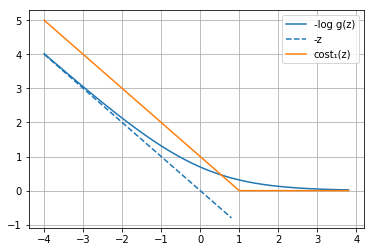

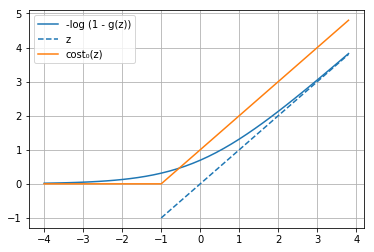

In [26]:
z = np.arange(-4, 4, 0.2)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

plt.plot(z, -np.log(sigmoid(z)), label='-log g(z)')
plt.plot(z[z<1], -z[z<1], '--', color='C0', label='-z')

plt.plot(z, np.maximum(-z+1, 0), label='cost₁(z)')
plt.legend()
plt.grid();

plt.figure()
plt.plot(z, -np.log(1 - sigmoid(z)), label='-log (1 - g(z))')
plt.plot(z[z>-1], z[z>-1], '--', color='C0', label='z')

plt.plot(z, np.maximum(z+1, 0), label='cost₀(z)')
plt.legend()
plt.grid();

